#Feature Engineering 

Загружаем необходимые модули

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Возьмем набор данных Titanic с Kaggle (https://www.kaggle.com/c/titanic/overview)

*   PassengerId - Порядковый номер пассажира
*   Survived - Выжил: 0 - нет, 1 - да (целевая переменная) 
*   Pclass - класс билета: 1-й (Upper), 2-й (Middle), 3-й (Lower)
*   Name - Имя пассажира
*   Sex - Пол пассажира
*   Age - Возраст пассажира
*   SibSp - Братьев/сестер/супругов на борту
*   Parch - Детей/родителей на борту
*   Ticket - Номер билета
*   Fare - Стоимость билета
*   Cabin - Номер каюты
*   Embarked - Порт посадки: C = Cherbourg, Q = Queenstown, S = Southampton

Загружаем и читаем данные

In [ ]:
x = pd.read_csv('titanic_train.csv', sep=',')
x_raw = x.copy()
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделим данные на признаки "x" и целевую переменную "y"

In [ ]:
y = x['Survived']
x.drop('Survived',  axis = 'columns', inplace = True)

Посмотрим какие признаки у нас есть

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Рассмотрим признак "PassengerId"

In [ ]:
x['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [ ]:
x['PassengerId'].nunique()

891

In [ ]:
# Удаляем из датафрейма этот признак как неинформативный
x.drop('PassengerId',  axis = 'columns', inplace = True)

Рассмотрим признак "Pclass"

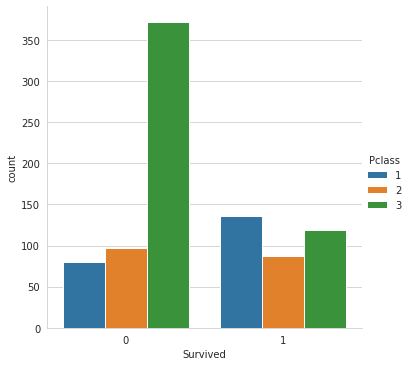

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x = 'Survived', data = x_raw, kind = 'count', hue = 'Pclass');

Рассмотрим признак "Name"

In [ ]:
x['Name'].describe()

count                   891
unique                  891
top       Badt, Mr. Mohamed
freq                      1
Name: Name, dtype: object

In [ ]:
# x.drop('Name',  axis = 'columns', inplace = True)

Разделим выборку на тренировочную и тестовую

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0, stratify = y, shuffle = True)
x_train = x_train.copy()
x_test = x_test.copy()

Выполним извлечение признаков из текстового столбца Name на основе статистики частотности слов по методике Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec_train = vec.fit_transform(x_train['Name'])
vec_test = vec.transform(x_test['Name'])

# удаляем текстовую переменную, на вход модели ее подать нельзя
x_train.drop('Name',  axis = 'columns', inplace = True)
x_test.drop('Name',  axis = 'columns', inplace = True)

In [ ]:
# выводим матрицу с коэффициентом Tfidf для каждого слова в столбце Name и каждой строки датафрейма 
print(vec.get_feature_names())
print(vec_train.toarray())
print(pd.DataFrame(vec_train.toarray(), columns=vec.get_feature_names()))

['abbott', 'abelson', 'abraham', 'achem', 'achille', 'achilles', 'ada', 'adahl', 'adams', 'adelaide', 'adele', 'adelia', 'adola', 'adolf', 'adolfina', 'adolphe', 'adrian', 'agatha', 'agda', 'agnes', 'ahlin', 'ahmed', 'aijo', 'aime', 'aks', 'albert', 'albin', 'albina', 'alden', 'alexander', 'alexandra', 'alexanteri', 'alexenia', 'alfons', 'alfred', 'alfrida', 'algernon', 'alhomaki', 'ali', 'alice', 'aline', 'allen', 'allison', 'alma', 'amanda', 'ambrose', 'amelia', 'amelie', 'amin', 'amy', 'anders', 'andersen', 'anderson', 'andersson', 'andre', 'andreas', 'andreasson', 'andree', 'andrew', 'andrews', 'andy', 'angle', 'ann', 'anna', 'anne', 'annie', 'anthony', 'antino', 'antonine', 'antti', 'appleton', 'archibald', 'archie', 'arne', 'arnold', 'artagaveytia', 'arthur', 'arvid', 'asim', 'asplund', 'assad', 'assi', 'astor', 'asuncion', 'atkinson', 'attalah', 'aubart', 'august', 'augusta', 'augustus', 'aurora', 'austin', 'ayoub', 'backstrom', 'baclini', 'badt', 'bailey', 'baird', 'balkic', 'b

In [ ]:
pd.DataFrame(vec_train.toarray(), columns=vec.get_feature_names()).tail().query('mr > 0')['mr']

707    0.129125
708    0.115367
709    0.140826
710    0.162078
711    0.157491
Name: mr, dtype: float64

Рассмотрим признак "Sex"

In [ ]:
x['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [ ]:
# Перекодируем в бинарный признак
labelEncoder = LabelEncoder()

x_train['Sex'] = labelEncoder.fit_transform(x_train['Sex'])
x_test['Sex'] = labelEncoder.transform(x_test['Sex'])

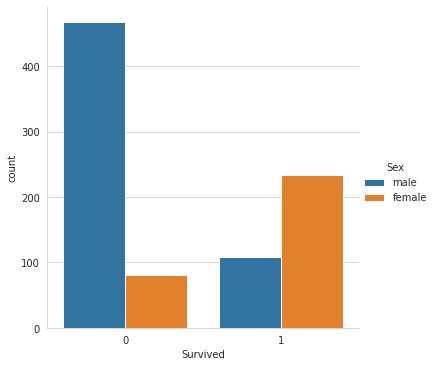

In [ ]:
sns.catplot(x = 'Survived', data = x_raw, kind = 'count', hue = 'Sex');

Рассмотрим признак "Age"

In [ ]:
x['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# заполим пропущенные значения
x_train["Age"] = x_train["Age"].fillna(x_train["Age"].mean())
x_test["Age"] = x_test["Age"].fillna(x_test["Age"].mean())
x_train.Age.isnull().value_counts()

False    712
Name: Age, dtype: int64

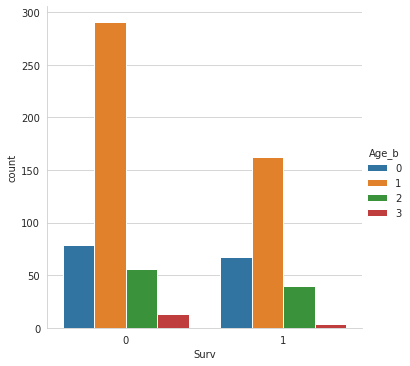

In [ ]:
# проведем биннинг переменной на 4 равных интервала
s, bins = pd.cut(x_train['Age'], 4, retbins=True, include_lowest = True)
x_train['Age_b'] = pd.cut(x_train['Age'], bins = bins, labels=False)
x_test['Age_b'] = pd.cut(x_test['Age'], bins = bins, labels=False)
x_corr = x_train.copy()
x_corr['Surv'] = y_train
sns.catplot(x = 'Surv', data = x_corr, kind = 'count', hue = 'Age_b');

In [ ]:
# границы полученных интервалов
bins

array([ 0.34042, 20.315  , 40.21   , 60.105  , 80.     ])

In [ ]:
s

502    (20.315, 40.21]
464    (20.315, 40.21]
198    (20.315, 40.21]
765    (40.21, 60.105]
421    (20.315, 40.21]
            ...       
131    (0.339, 20.315]
490    (20.315, 40.21]
528    (20.315, 40.21]
48     (20.315, 40.21]
80     (20.315, 40.21]
Name: Age, Length: 712, dtype: category
Categories (4, interval[float64]): [(0.339, 20.315] < (20.315, 40.21] < (40.21, 60.105] <
                                    (60.105, 80.0]]

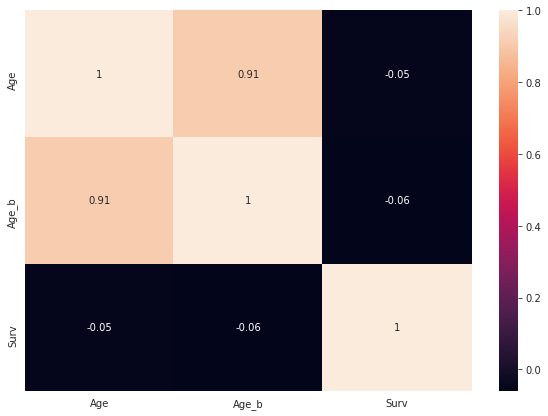

In [ ]:
x_corr = x_train[['Age', 'Age_b']].copy()
x_corr['Surv'] = y_train
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True);

Рассмотрим признаки "SibSp" и "Parch"

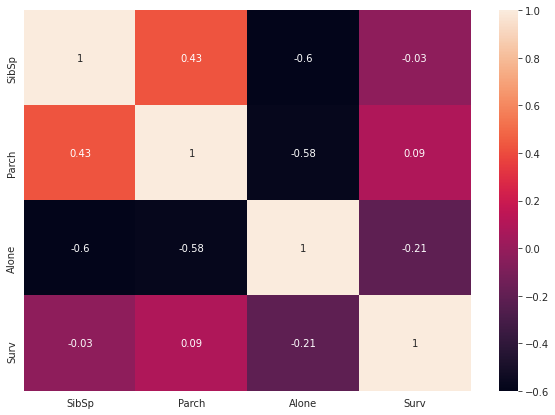

In [ ]:
# создадаим новые переменные
datasets = [x_train, x_test]
for ds in datasets:
    ds['Family_count'] = ds['SibSp'] + ds['Parch']
    ds.loc[ds['Family_count'] > 0, 'Alone'] = 0
    ds.loc[ds['Family_count'] == 0, 'Alone'] = 1
    
x_corr = x_train[['SibSp', 'Parch', 'Alone']].copy()
x_corr['Surv'] = y_train
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

Рассмотрим признак "Ticket"

In [ ]:
x['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [ ]:
# удалим неинформативную переменную
x_train.drop('Ticket',  axis = 'columns', inplace = True)
x_test.drop('Ticket',  axis = 'columns', inplace = True)

Рассмотрим признак "Fare"

In [ ]:
x['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

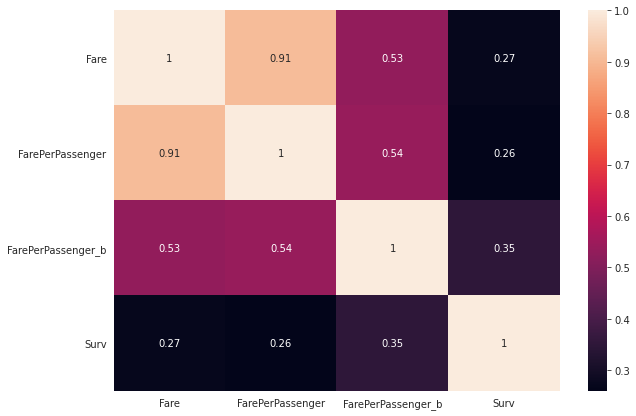

In [ ]:
# создадим удельную переменную и проведем ее квантилизацию

x_train['FarePerPassenger'] = x_train.apply(lambda row: row['Fare'] / row['Family_count'] if row['Alone'] == 0 else row['Fare'], axis = 1)
x_test['FarePerPassenger'] = x_test.apply(lambda row: row['Fare'] / row['Family_count'] if row['Alone'] == 0 else row['Fare'], axis = 1)

s, bins = pd.qcut(x_train['FarePerPassenger'], 6, retbins=True)
x_train['FarePerPassenger_b'] = pd.cut(x_train['FarePerPassenger'], bins = bins, labels=False)
x_test['FarePerPassenger_b'] = pd.cut(x_test['FarePerPassenger'], bins = bins, labels=False)

x_train["FarePerPassenger_b"] = x_train["FarePerPassenger_b"].fillna(x_train["FarePerPassenger_b"].mean())
x_test["FarePerPassenger_b"] = x_test["FarePerPassenger_b"].fillna(x_test["FarePerPassenger_b"].mean())

x_corr = x_train[['Fare', 'FarePerPassenger', 'FarePerPassenger_b']].copy()
x_corr['Surv'] = y_train
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

Рассмотрим признак "Cabin"

In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_b,Family_count,Alone,FarePerPassenger,FarePerPassenger_b
502,3,0,29.469823,0,0,7.6292,NaN,Q,1,0,1.0,7.6292,1.0
464,3,1,29.469823,0,0,8.0500,NaN,S,1,0,1.0,8.0500,2.0
198,3,0,29.469823,0,0,7.7500,NaN,Q,1,0,1.0,7.7500,1.0
765,1,0,51.000000,1,0,77.9583,D11,S,2,1,0.0,77.9583,5.0
421,3,1,21.000000,0,0,7.7333,NaN,Q,1,0,1.0,7.7333,1.0


In [ ]:
# отберем заглавные буквы 
x_train["Cabin"].fillna('Other').apply(lambda x: str(x)[0]).value_counts()

O    552
C     46
B     44
D     28
E     24
F      8
A      6
G      3
T      1
Name: Cabin, dtype: int64

In [ ]:
# перекодируем 
def encode_cabin(x):
    if str(x)[0] in ["B", "C", "D", "E", "F"]:
        return 1
    elif str(x)[0] in ["A", "G"]:
        return 2
    else:
        return 3

x_train["Cabin_b"] = x_train["Cabin"].apply(lambda x: encode_cabin(x))
x_test["Cabin_b"] = x_test["Cabin"].apply(lambda x: encode_cabin(x))

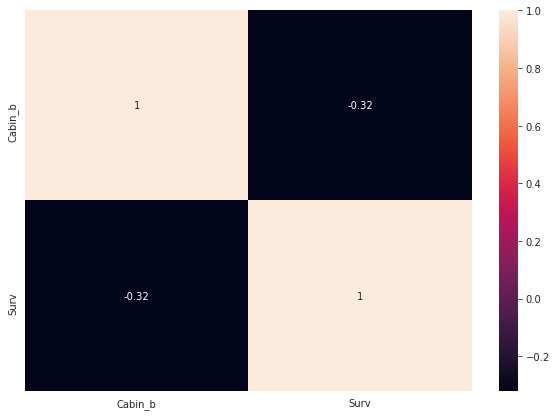

In [ ]:
x_train.drop(labels = ["Cabin"], axis = 1, inplace = True)
x_test.drop(labels = ["Cabin"], axis = 1, inplace = True)

x_corr = x_train[['Cabin_b']].copy()
x_corr['Surv'] = y_train
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True);

Рассмотрим признак "Embarked"

In [ ]:
x.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
sum(x.Embarked.isna())

2

In [ ]:
x_train["Embarked"] = x_train["Embarked"].fillna('S')
x_test["Embarked"] = x_test["Embarked"].fillna('S')

Выполним извлечение признаков из текстового столбца с указанием географического названия

In [ ]:
# !pip install geopy
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Cherbourg")
print((location.latitude, location.longitude))

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


(49.6425343, -1.6249565)


In [ ]:
location = geolocator.geocode("Queenstown")
print((location.latitude, location.longitude))

(-45.0321923, 168.661)


In [ ]:
location = geolocator.geocode("Southampton")
print((location.latitude, location.longitude))

(50.9025349, -1.404189)


In [ ]:
lat = {'C':49.6425343, 'Q':-45.0321923, 'S': 50.9025349}
x_train['latitude'] = x_train['Embarked'].map(lat)
x_test['latitude'] = x_test['Embarked'].map(lat)

In [ ]:
lon = {'C':-1.6249565, 'Q':168.661, 'S':-1.404189}
x_train['longitude'] = x_train['Embarked'].map(lon)
x_test['longitude'] = x_test['Embarked'].map(lon)

In [ ]:
# произыведем кодирование исходного столбца
labelEncoder = LabelEncoder()

x_train['Embarked'] = labelEncoder.fit_transform(x_train['Embarked'])
x_test['Embarked'] = labelEncoder.transform(x_test['Embarked'])
x_train['Embarked'].value_counts()

2    520
0    131
1     61
Name: Embarked, dtype: int64

#Feature Selection 

Попробуем оставить только значимые признаки, выбрав их вручную

In [ ]:
x_train_manual = x_train.copy()
x_test_manual = x_test.copy()
x_train_manual.drop(labels = ["Age","SibSp","Parch","Fare", "Family_count", "FarePerPassenger"], axis = 1, inplace = True)
x_test_manual.drop(labels = ["Age","SibSp","Parch","Fare", "Family_count", "FarePerPassenger"], axis = 1, inplace = True)
x_test_manual.head()

,Pclass,Sex,Embarked,Age_b,Alone,FarePerPassenger_b,Cabin_b,latitude,longitude
153,3,1,2,2,0.0,0.0,3,50.902535,-1.404189
752,3,1,2,1,1.0,2.0,3,50.902535,-1.404189
610,3,0,2,1,0.0,0.0,3,50.902535,-1.404189
200,3,1,2,1,1.0,2.0,3,50.902535,-1.404189
310,1,0,0,1,1.0,5.0,1,49.642534,-1.624956


Теперь попробуем применить SelectFromModel + ExtraTreesClassifier

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 153 to 143
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              179 non-null    int64  
 1   Sex                 179 non-null    int64  
 2   Age                 179 non-null    float64
 3   SibSp               179 non-null    int64  
 4   Parch               179 non-null    int64  
 5   Fare                179 non-null    float64
 6   Embarked            179 non-null    int64  
 7   Age_b               179 non-null    int64  
 8   Family_count        179 non-null    int64  
 9   Alone               179 non-null    float64
 10  FarePerPassenger    179 non-null    float64
 11  FarePerPassenger_b  179 non-null    float64
 12  Cabin_b             179 non-null    int64  
 13  latitude            179 non-null    float64
 14  longitude           179 non-null    float64
dtypes: float64(7), int64(8)
memory usage: 22.4 KB


In [ ]:
x_train_select = x_train.copy()
x_test_select = x_test.copy()

estimator = ExtraTreesClassifier(n_estimators = 10)
featureSelection = SelectFromModel(estimator)
featureSelection.fit(x_train_select, y_train)
x_train_select = pd.DataFrame(featureSelection.transform(x_train_select), columns = x_train_select.columns.values[featureSelection.get_support()]) 
x_test_select = pd.DataFrame(featureSelection.transform(x_test_select), columns = x_test_select.columns.values[featureSelection.get_support()]) 
x_train_select.head()

,Sex,Age,Fare,FarePerPassenger,FarePerPassenger_b
0,0.0,29.469823,7.6292,7.6292,1.0
1,1.0,29.469823,8.0500,8.0500,2.0
2,0.0,29.469823,7.7500,7.7500,1.0
3,0.0,51.000000,77.9583,77.9583,5.0
4,1.0,21.000000,7.7333,7.7333,1.0


Теперь попробуем применить SelectKBest + chi2

In [ ]:
x_train_select2 = x_train.copy()
x_test_select2 = x_test.copy()

featureSelection = SelectKBest(chi2, k=6) 
featureSelection.fit(x_train_select2.iloc[:,:-2], y_train)
x_train_select2 = pd.DataFrame(featureSelection.transform(x_train_select2.iloc[:,:-2]), columns = x_train_select2.iloc[:,:-2].columns.values[featureSelection.get_support()]) 
x_test_select2 = pd.DataFrame(featureSelection.transform(x_test_select2.iloc[:,:-2]), columns = x_test_select2.iloc[:,:-2].columns.values[featureSelection.get_support()]) 
x_train_select2.head()

,Pclass,Sex,Fare,FarePerPassenger,FarePerPassenger_b,Cabin_b
0,3.0,0.0,7.6292,7.6292,1.0,3.0
1,3.0,1.0,8.0500,8.0500,2.0,3.0
2,3.0,0.0,7.7500,7.7500,1.0,3.0
3,1.0,0.0,77.9583,77.9583,5.0,1.0
4,3.0,1.0,7.7333,7.7333,1.0,3.0


#Обучение

In [ ]:
# поскольку будем использовать для обучения логистическую регрессию, то приведем признаки к единому масштабу
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_train_manual_new = sc1.fit_transform(x_train_manual)
x_train_manual_new = pd.DataFrame(x_train_manual_new, columns = x_train_manual.columns)
x_test_manual_new = sc1.transform(x_test_manual)
x_test_manual_new = pd.DataFrame(x_test_manual_new, columns = x_test_manual.columns)

sc2 = StandardScaler()
x_train_select_new = sc2.fit_transform(x_train_select)
x_train_select_new = pd.DataFrame(x_train_select_new, columns = x_train_select.columns)
x_test_select_new = sc2.transform(x_test_select)
x_test_select_new = pd.DataFrame(x_test_select_new, columns = x_test_select.columns)

sc3 = StandardScaler()
x_train_select2_new = sc3.fit_transform(x_train_select2)
x_train_select2_new = pd.DataFrame(x_train_select2_new, columns = x_train_select2.columns)
x_test_select2_new = sc3.transform(x_test_select2)
x_test_select2_new = pd.DataFrame(x_test_select2_new, columns = x_test_select2.columns)

In [ ]:
# обучим модель №1
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(x_train_manual_new, y_train)
print("Train Accuracy: ", logisticRegression.score(x_train_manual_new, y_train))
print("Test Accuracy: ", logisticRegression.score(x_test_manual_new, y_test))

Train Accuracy:  0.8033707865168539
Test Accuracy:  0.8100558659217877


In [ ]:
# обучим модель №2
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(x_train_select_new, y_train)
print("Train Accuracy: ", logisticRegression.score(x_train_select_new, y_train))
print("Test Accuracy: ", logisticRegression.score(x_test_select_new, y_test))

Train Accuracy:  0.7865168539325843
Test Accuracy:  0.7988826815642458


In [ ]:
# обучим модель №3
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(x_train_select2_new, y_train)
print("Train Accuracy: ", logisticRegression.score(x_train_select2_new, y_train))
print("Test Accuracy: ", logisticRegression.score(x_test_select2_new, y_test))

Train Accuracy:  0.7935393258426966
Test Accuracy:  0.770949720670391


In [ ]:
# обучим модель №4
randomForestClassifier = RandomForestClassifier(n_estimators = 1000, max_depth = 2, max_features='log2', random_state=42)
randomForestClassifier.fit(x_train, y_train)
print("Train Accuracy: ", randomForestClassifier.score(x_train, y_train))
print("Test Accuracy: ", randomForestClassifier.score(x_test, y_test))

Train Accuracy:  0.7865168539325843
Test Accuracy:  0.7486033519553073


In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_b,Family_count,Alone,FarePerPassenger,FarePerPassenger_b,Cabin_b,latitude,longitude
502,3,0,29.469823,0,0,7.6292,1,1,0,1.0,7.6292,1.0,3,-45.032192,168.661000
464,3,1,29.469823,0,0,8.0500,2,1,0,1.0,8.0500,2.0,3,50.902535,-1.404189
198,3,0,29.469823,0,0,7.7500,1,1,0,1.0,7.7500,1.0,3,-45.032192,168.661000
765,1,0,51.000000,1,0,77.9583,2,2,1,0.0,77.9583,5.0,1,50.902535,-1.404189
421,3,1,21.000000,0,0,7.7333,1,1,0,1.0,7.7333,1.0,3,-45.032192,168.661000


In [ ]:
# сгенерим взаимодествия между столбцами
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
x_train_2 = poly.fit_transform(x_train)
x_train_2 = pd.DataFrame(x_train_2, columns = poly.get_feature_names(x_train.columns))
x_test_2 = poly.fit_transform(x_test)
x_test_2 = pd.DataFrame(x_test_2, columns = poly.get_feature_names(x_test.columns))

In [ ]:
x_train_2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_b,Family_count,Alone,FarePerPassenger,FarePerPassenger_b,Cabin_b,latitude,longitude,Pclass Sex,Pclass Age,Pclass SibSp,Pclass Parch,Pclass Fare,Pclass Embarked,Pclass Age_b,Pclass Family_count,Pclass Alone,Pclass FarePerPassenger,Pclass FarePerPassenger_b,Pclass Cabin_b,Pclass latitude,Pclass longitude,Sex Age,Sex SibSp,Sex Parch,Sex Fare,Sex Embarked,Sex Age_b,Sex Family_count,Sex Alone,Sex FarePerPassenger,Sex FarePerPassenger_b,Sex Cabin_b,...,Fare FarePerPassenger_b,Fare Cabin_b,Fare latitude,Fare longitude,Embarked Age_b,Embarked Family_count,Embarked Alone,Embarked FarePerPassenger,Embarked FarePerPassenger_b,Embarked Cabin_b,Embarked latitude,Embarked longitude,Age_b Family_count,Age_b Alone,Age_b FarePerPassenger,Age_b FarePerPassenger_b,Age_b Cabin_b,Age_b latitude,Age_b longitude,Family_count Alone,Family_count FarePerPassenger,Family_count FarePerPassenger_b,Family_count Cabin_b,Family_count latitude,Family_count longitude,Alone FarePerPassenger,Alone FarePerPassenger_b,Alone Cabin_b,Alone latitude,Alone longitude,FarePerPassenger FarePerPassenger_b,FarePerPassenger Cabin_b,FarePerPassenger latitude,FarePerPassenger longitude,FarePerPassenger_b Cabin_b,FarePerPassenger_b latitude,FarePerPassenger_b longitude,Cabin_b latitude,Cabin_b longitude,latitude longitude
0,3.0,0.0,29.469823,0.0,0.0,7.6292,1.0,1.0,0.0,1.0,7.6292,1.0,3.0,-45.032192,168.661000,0.0,88.40947,0.0,0.0,22.8876,3.0,3.0,0.0,3.0,22.8876,3.0,9.0,-135.096577,505.983000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,7.6292,22.8876,-343.559601,1286.748501,1.0,0.0,1.0,7.6292,1.0,3.0,-45.032192,168.661000,0.0,1.0,7.6292,1.0,3.0,-45.032192,168.661000,0.0,0.0000,0.0,0.0,-0.000000,0.000000,7.6292,1.0,3.0,-45.032192,168.661000,7.6292,22.8876,-343.559601,1286.748501,3.0,-45.032192,168.661000,-135.096577,505.983000,-7595.174586
1,3.0,1.0,29.469823,0.0,0.0,8.0500,2.0,1.0,0.0,1.0,8.0500,2.0,3.0,50.902535,-1.404189,3.0,88.40947,0.0,0.0,24.1500,6.0,3.0,0.0,3.0,24.1500,6.0,9.0,152.707605,-4.212567,29.469823,0.0,0.0,8.0500,2.0,1.0,0.0,1.0,8.0500,2.0,3.0,...,16.1000,24.1500,409.765406,-11.303721,2.0,0.0,2.0,16.1000,4.0,6.0,101.805070,-2.808378,0.0,1.0,8.0500,2.0,3.0,50.902535,-1.404189,0.0,0.0000,0.0,0.0,0.000000,-0.000000,8.0500,2.0,3.0,50.902535,-1.404189,16.1000,24.1500,409.765406,-11.303721,6.0,101.805070,-2.808378,152.707605,-4.212567,-71.476780
2,3.0,0.0,29.469823,0.0,0.0,7.7500,1.0,1.0,0.0,1.0,7.7500,1.0,3.0,-45.032192,168.661000,0.0,88.40947,0.0,0.0,23.2500,3.0,3.0,0.0,3.0,23.2500,3.0,9.0,-135.096577,505.983000,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,7.7500,23.2500,-348.999490,1307.122750,1.0,0.0,1.0,7.7500,1.0,3.0,-45.032192,168.661000,0.0,1.0,7.7500,1.0,3.0,-45.032192,168.661000,0.0,0.0000,0.0,0.0,-0.000000,0.000000,7.7500,1.0,3.0,-45.032192,168.661000,7.7500,23.2500,-348.999490,1307.122750,3.0,-45.032192,168.661000,-135.096577,505.983000,-7595.174586
3,1.0,0.0,51.000000,1.0,0.0,77.9583,2.0,2.0,1.0,0.0,77.9583,5.0,1.0,50.902535,-1.404189,0.0,51.00000,1.0,0.0,77.9583,2.0,2.0,1.0,0.0,77.9583,5.0,1.0,50.902535,-1.404189,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,389.7915,77.9583,3968.275086,-109.468187,4.0,2.0,0.0,155.9166,10.0,2.0,101.805070,-2.808378,2.0,0.0,155.9166,10.0,2.0,101.805070,-2.808378,0.0,77.9583,5.0,1.0,50.902535,-1.404189,0.0000,0.0,0.0,0.000000,-0.000000,389.7915,77.9583,3968.275086,-109.468187,5.0,254.512675,-7.020945,50.902535,-1.404189,-71.476780
4,3.0,1.0,21.000000,0.0,0.0,7.7333,1.0,1.0,0.0,1.0,7.7333,1.0,3.0,-45.032192,168.661000,3.0,63.00000,0.0,0.0,23.1999,3.0,3.0,0.0,3.0,23.1999,3.0,9.0,-135.096577,505.983000,21.000000,0.0,0.0,7.7333,1.0,1.0,0.0,1.0,7.7333,1.0,3.0,...,7.7333,23.1999,-348.247453,1304.306111,1.0,0.0,1.0,7.7333,1.0,3.0,-45.032192,168.661000,0.0,1.0,7.7333,1.0,3.0,-45.032192,168.661000,0.0,0.0000,0.0,0.0,-0.000000,0.000000,7.7333,1.0,3.0,-45.032192,168.661000,7.7333,23.1999,-348.247453,1304.306111,3.0,-45.032192,168.661000,-135.096577,

In [ ]:
# обучим модель №5
randomForestClassifier2 = RandomForestClassifier(n_estimators = 1000, max_depth = 2, max_features='log2', random_state=0)
randomForestClassifier2.fit(x_train_2, y_train)
print("Train Accuracy: ", randomForestClassifier2.score(x_train_2, y_train))
print("Test Accuracy: ", randomForestClassifier2.score(x_test_2, y_test))

Train Accuracy:  0.8202247191011236
Test Accuracy:  0.8156424581005587


In [ ]:
# выведем рейтинг важности признаков с учетом их взаимодействий
feature_scores = pd.Series(randomForestClassifier2.feature_importances_, index=x_train_2.columns).sort_values(ascending=False)
feature_scores.head(30)

Sex Cabin_b                            0.074979
Sex Age                                0.073544
Sex                                    0.051017
Pclass Sex                             0.049635
Sex Fare                               0.049266
Sex Embarked                           0.046324
Sex FarePerPassenger                   0.044244
Sex latitude                           0.039987
Sex Alone                              0.033924
Sex longitude                          0.033184
Sex Age_b                              0.032596
Fare FarePerPassenger_b                0.021694
FarePerPassenger                       0.020956
Sex FarePerPassenger_b                 0.020271
FarePerPassenger latitude              0.020234
FarePerPassenger longitude             0.017868
Age Cabin_b                            0.017089
Fare                                   0.016446
Pclass Cabin_b                         0.016131
Pclass longitude                       0.014841
Pclass latitude                        0

In [ ]:
# добавим фичи на основе текстовой переменной name, сгенерированные по методике Tfidf
import scipy.sparse
x_train_3 = scipy.sparse.hstack([x_train_2, vec_train])

In [ ]:
x_test_3 = scipy.sparse.hstack([x_test_2, vec_test])

In [ ]:
# обучим модель №6
randomForestClassifier3 = RandomForestClassifier(n_estimators = 500, max_depth = 3, max_features='sqrt', random_state=1)
randomForestClassifier3.fit(x_train_3, y_train)
print("Train Accuracy: ", randomForestClassifier3.score(x_train_3, y_train))
print("Test Accuracy: ", randomForestClassifier3.score(x_test_3, y_test))

Train Accuracy:  0.8328651685393258
Test Accuracy:  0.8212290502793296


In [ ]:
# выведем важность признаков
feature_scores = pd.Series(randomForestClassifier3.feature_importances_, index=x_train_2.columns.tolist() + vec.get_feature_names()).sort_values(ascending=False)
feature_scores.head(50)

Sex Cabin_b                            0.055120
Sex Age                                0.043211
Sex                                    0.041323
mr                                     0.040532
Sex FarePerPassenger                   0.040403
Pclass Sex                             0.035692
Sex latitude                           0.028984
Sex Fare                               0.028089
Sex Embarked                           0.027921
Fare FarePerPassenger_b                0.025428
Sex FarePerPassenger_b                 0.024940
Sex Age_b                              0.024577
Sex longitude                          0.024529
Sex Alone                              0.020237
FarePerPassenger                       0.018669
Pclass latitude                        0.017278
Age Cabin_b                            0.016045
Fare longitude                         0.015972
FarePerPassenger latitude              0.015167
FarePerPassenger FarePerPassenger_b    0.014867
Pclass longitude                       0